# Learning Quiz 2


### Members:

- Lefteris Chatziefraimidis 2209
- George Fragkias 2118

# Learning Goals

1. Know the definitions of sample space, event and probability function.

2. Be able to organize a scenario with randomness into an experiment and sample space.

3. Be able to make basic computations using a probability function.

## Probability terminology list 

* Experiment: a repeatable procedure with well-deﬁned possible outcomes. 

* Sample space: the set of all possible outcomes. We usually denote the sample space by $\Omega$, sometimes by $S$. 

* Event: a subset of the sample space. 

* Probability function: a function giving the probability for each outcome. 

* Probability density: a continuous distribution of probabilities. 

* Random variable: a random numerical outcome. 


In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            

## Install Dependencies

In [17]:
install.packages("cluster",quiet=TRUE)

In [8]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager",quiet=TRUE)
BiocManager::install()

In [1]:
install.packages(c("MASS", "mgcv", "nlme","survival"),quiet=TRUE)

Warning message in install.packages(c("MASS", "mgcv", "nlme", "survival"), quiet = TRUE):
“installation of package ‘survival’ had non-zero exit status”


In [1]:
install.packages(c("foreign","diagram","prob"))

Installing packages into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘callr’, ‘pkgbuild’, ‘pkgload’, ‘testthat’, ‘isoband’, ‘scales’, ‘ggplot2’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘tidyselect’, ‘cellranger’, ‘progress’, ‘conquer’, ‘openxlsx’, ‘mitools’, ‘sandwich’, ‘Hmisc’, ‘haven’, ‘readxl’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘survey’, ‘timeSeries’, ‘fBasics’, ‘fOptions’, ‘RcmdrMisc’, ‘car’, ‘effects’, ‘tcltk2’, ‘lme4’, ‘fAsianOptions’, ‘Rcmdr’


Warning message in install.packages(c("foreign", "diagram", "prob", "RcmdrPlugin.IPSUR")):
“installation of package ‘latticeExtra’ had non-zero exit status”
Warning message in install.packages(c("foreign", "diagram", "prob", "RcmdrPlugin.IPSUR")):
“installation of package ‘Hmisc’ had non-zero exit status”
Warning message in install.packages(c("foreign", "diagram", "prob", "RcmdrPlugin.IPSUR")):
“installation of package ‘RcmdrMisc’ had non-zero exit s

In [10]:
install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", type="source",INSTALL_opts = c('--no-lock'))

Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘latticeExtra’, ‘Hmisc’, ‘RcmdrMisc’, ‘Rcmdr’


Warning message in install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", :
“installation of package ‘latticeExtra’ had non-zero exit status”
Warning message in install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", :
“installation of package ‘Hmisc’ had non-zero exit status”
Warning message in install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", :
“installation of package ‘RcmdrMisc’ had non-zero exit status”
Warning message in install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", :
“installation of package ‘Rcmdr’ had non-zero exit status”
Warning message in install.packages("RcmdrPlugin.IPSUR", repos = "http://www.cran.r-project.org", :
“installation of package ‘RcmdrPlugin.IPSUR’ had non-zero exit status

### Import Libraries

In [11]:
library(foreign)
library(diagram)
library(prob)
library(RcmdrPlugin.IPSUR)

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 



#    Chapter 4 : Probability

IPSUR: Introduction to Probability and Statistics Using R
These are the R commands supporting in IPSUR library and the code presented in the examples of chapter 4.

**You will use these commands to answer the exercises in this learning quizz**

null device 
          1

lands
<chr>
down
up
side


toss1
<fct>
H
T


toss1,toss2,toss3
<fct>,<fct>,<fct>
H,H,H
T,H,H
H,T,H
T,T,H
H,H,T
T,H,T
H,T,T
T,T,T


X1
<int>
1
2
3
4
5
6


,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club
3,4,Club
4,5,Club
5,6,Club
6,7,Club


X1,X2
<int>,<int>
1,1
2,1
3,1
1,2
2,2
3,2
1,3
2,3
3,3


X1,X2
<int>,<int>
1,2
2,1
1,3
3,1
2,3
3,2


X1,X2
<int>,<int>
1,2
1,3
2,3


X1,X2
<int>,<int>
1,1
1,2
1,3
2,2
2,3
3,3


,toss1,toss2,probs
,<fct>,<fct>,<dbl>
1,H,H,0.25
2,T,H,0.25
3,H,T,0.25


,toss1,toss2,probs
,<fct>,<fct>,<dbl>
2,T,H,0.25
4,T,T,0.25


,rank,suit
,<fct>,<fct>
27,2,Heart
28,3,Heart
29,4,Heart
30,5,Heart
31,6,Heart
32,7,Heart
33,8,Heart
34,9,Heart
35,10,Heart


,rank,suit
,<fct>,<fct>
6,7,Club
7,8,Club
8,9,Club
19,7,Diamond
20,8,Diamond
21,9,Diamond
32,7,Heart
33,8,Heart
34,9,Heart


,X1,X2,X3
,<int>,<int>,<int>
180,6,6,5
210,6,5,6
215,5,6,6
216,6,6,6


[1]  TRUE  TRUE  TRUE FALSE FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

,X1,X2,X3,X4
,<int>,<int>,<int>,<int>
188,2,2,6,1
404,2,2,6,2
620,2,2,6,3
836,2,2,6,4
1052,2,2,6,5
1088,2,2,1,6
1118,2,1,2,6
1123,1,2,2,6
1124,2,2,2,6


,rank,suit
,<fct>,<fct>
6,7,Club
7,8,Club
8,9,Club
19,7,Diamond
20,8,Diamond
21,9,Diamond
27,2,Heart
28,3,Heart
29,4,Heart


,rank,suit
,<fct>,<fct>
32,7,Heart
33,8,Heart
34,9,Heart


,rank,suit
,<fct>,<fct>
27,2,Heart
28,3,Heart
29,4,Heart
30,5,Heart
31,6,Heart
35,10,Heart
36,J,Heart
37,Q,Heart
38,K,Heart


,rank,suit
,<fct>,<fct>
6,7,Club
7,8,Club
8,9,Club
19,7,Diamond
20,8,Diamond
21,9,Diamond
45,7,Spade
46,8,Spade
47,9,Spade


X1,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


x,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


x,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


X1,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


toss1,probs
<fct>,<dbl>
H,0.7
T,0.3


[1] 0.25

[1] 0.25

[1] 9

[1] 6

[1] 3

[1] 6

[1] 24774195600

[1] 24774195600

[1] 24774195600

[1] 24774195600

null device 
          1

ERROR: Error in ggplot(rbind(B, C), aes(x = X1, y = X2, label = lab)): could not find function "ggplot"


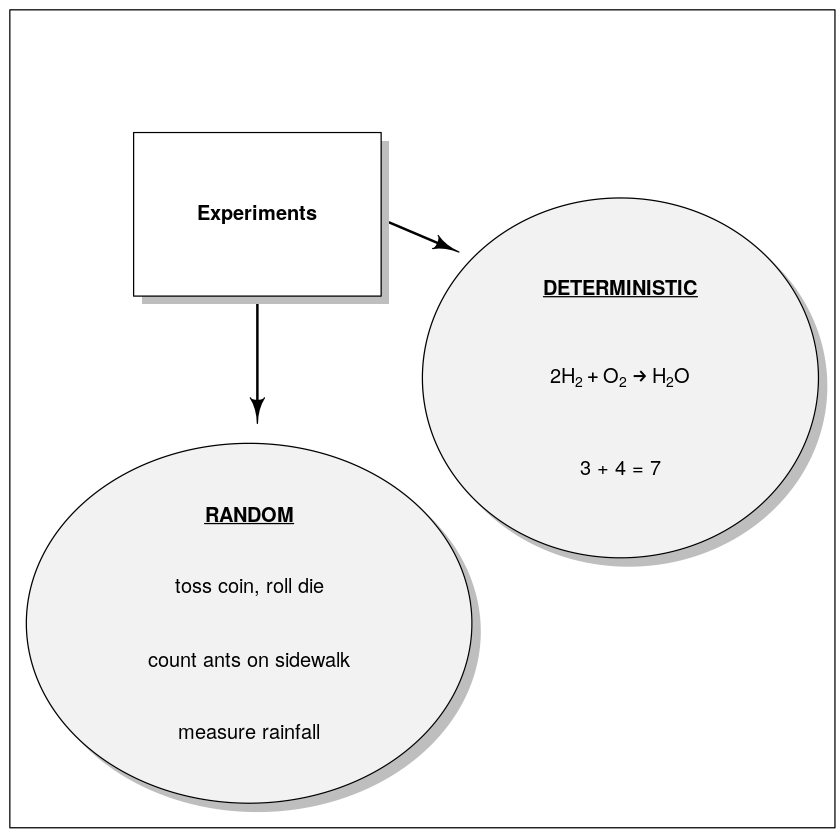

In [15]:
# This chapter's package dependencies
library(diagram)
library(prob)
library(RcmdrPlugin.IPSUR)

par(mex = 0.2, cex = 0.5)
openplotmat(frame.plot=TRUE)
straightarrow(from = c(0.46,0.74), to = c(0.53,0.71), arr.pos = 1)
straightarrow(from = c(0.3,0.65), to = c(0.3,0.51), arr.pos = 1)
textellipse(mid = c(0.74,0.55), box.col = grey(0.95), 
  radx = 0.24, rady = 0.22, 
  lab = c(expression(bold(underline(DETERMINISTIC))), 
          expression(2*H[2]+O[2] %->% H[2]*O), "3 + 4 = 7"), cex = 2 )
textrect(mid = c(0.3, 0.75), radx = 0.15, rady = 0.1, 
  lab = c(expression(bold(Experiments))), cex = 2 )
textellipse(mid = c(0.29,0.25), box.col = grey(0.95), 
  radx = 0.27, rady = 0.22, lab = c(expression(bold(underline(RANDOM))), 
  "toss coin, roll die", "count ants on sidewalk", "measure rainfall" ), 
  cex = 2 )
dev.off()

S <- data.frame(lands = c("down","up","side"))
S

tosscoin(1)

tosscoin(3)

rolldie(1)

head(cards())

urnsamples(1:3, size = 2, replace = TRUE, ordered = TRUE)

urnsamples(1:3, size = 2, replace = FALSE, ordered = TRUE)

urnsamples(1:3, size = 2, replace = FALSE, ordered = FALSE)

urnsamples(1:3, size = 2, replace = TRUE, ordered = FALSE)

S <- tosscoin(2, makespace = TRUE) 
S[1:3, ]

S[c(2,4), ]

S <- cards()

subset(S, suit == "Heart")

subset(S, rank %in% 7:9)

subset(rolldie(3), X1+X2+X3 > 16)

x <- 1:10 
y <- 8:12 
y %in% x

isin(x,y)

x <- 1:10 
y <- c(3,3,7)

all(y %in% x)
isin(x,y)

isin(x, c(3,4,5), ordered = TRUE) 
isin(x, c(3,5,4), ordered = TRUE)

S <- rolldie(4) 
subset(S, isin(S, c(2,2,6), ordered = TRUE))

S <- cards() 
A <- subset(S, suit == "Heart") 
B <- subset(S, rank %in% 7:9)

union(A,B)

intersect(A,B)

setdiff(A,B)

setdiff(B,A)

outcomes <- rolldie(1) 
p <- rep(1/6, times = 6) 
probspace(outcomes, probs = p)

probspace(1:6, probs = p)

probspace(1:6)

rolldie(1, makespace = TRUE)

probspace(tosscoin(1), probs = c(0.70, 0.30))

S <- cards(makespace = TRUE) 
A <- subset(S, suit == "Heart") 
B <- subset(S, rank %in% 7:9)

Prob(A)

Prob(S, suit == "Heart")

nsamp(n=3, k=2, replace = TRUE, ordered = TRUE) 
nsamp(n=3, k=2, replace = FALSE, ordered = TRUE) 
nsamp(n=3, k=2, replace = FALSE, ordered = FALSE) 
nsamp(n=3, k=2, replace = TRUE, ordered = FALSE)

n <- c(11,7,31) 
k <- c(3,4,3) 
r <- c(FALSE,FALSE,TRUE)

x <- nsamp(n, k, rep = r, ord = TRUE)

prod(x)

(11*10*9)*(7*6*5*4)*31^3

prod(9:11)*prod(4:7)*31^3

prod(factorial(c(11,7))/factorial(c(8,3)))*31^3

g <- Vectorize(pbirthday.ipsur)
plot(1:50, g(1:50), xlab = "Number of people in room", ylab = "Prob(at least one match)")
remove(g)
dev.off()

library(RcmdrPlugin.IPSUR)
g <- Vectorize(pbirthday.ipsur)
plot(1:50, g(1:50), xlab = "Number of people in room", 
  ylab = "Prob(at least one match)" )
abline(h = 0.5)
abline(v = 23, lty = 2)
remove(g)

A <- rolldie(2)
B <- subset(A, X1==X2)
C <- subset(A, X1+X2 > 7)
B$lab <- rep("X", dim(B)[1])
C$lab <- rep("O", dim(C)[1])
p <- ggplot(rbind(B, C), aes(x=X1, y=X2, label=lab))
p + geom_text(size = 15) + xlab("First roll") + ylab("Second roll")
dev.off()

S <- rolldie(2, makespace = TRUE)  # assumes ELM
head(S)                            #  first few rows

A <- subset(S, X1 == X2)
B <- subset(S, X1 + X2 >= 8)

Prob(A, given = B)
Prob(B, given = A)

Prob(S, X1==X2, given = (X1 + X2 >= 8) )
Prob(S, X1+X2 >= 8, given = (X1==X2) )

L <- cards()
M <- urnsamples(L, size = 2)
N <- probspace(M)
N[[1]][[1]];  N$probs[1]

Prob(N, all(rank == "A"))

L <- rep(c("red","green"), times = c(7,3))
M <- urnsamples(L, size = 3, replace = FALSE, ordered = TRUE)
N <- probspace(M)

Prob(N, isrep(N, "red", 3))

Prob(N, isrep(N, "red", 2))

Prob(N, isin(N, c("red","green","red"), ordered = TRUE))

Prob(N, isin(N, c("red","green","red")))

library(RcmdrPlugin.IPSUR)
data(RcmdrTestDrive)  
.Table <- xtabs( ~ smoking + gender, data = RcmdrTestDrive)
addmargins(.Table) # Table with marginal distributions

S <- tosscoin(10, makespace = TRUE)
A <- subset(S, isrep(S, vals = "T", nrep = 10))
1 - Prob(A)

iidspace(c("H","T"), ntrials = 3, probs = c(0.7, 0.3))

prior <- c(0.6, 0.3, 0.1)
like <- c(0.003, 0.007, 0.010)
post <- prior * like
post / sum(post)

newprior <- post
post <- newprior * like^7
post / sum(post)

fastpost <- prior * like^8
fastpost / sum(fastpost)

S <- rolldie(3, nsides = 4, makespace = TRUE) 
S <- addrv(S, U = X1-X2+X3)

head(S)

Prob(S, U > 6)

S <- addrv(S, FUN = max, invars = c("X1","X2","X3"), name = "V") 
S <- addrv(S, FUN = sum, invars = c("X1","X2","X3"), name = "W") 
head(S)

marginal(S, vars = "V")

marginal(S, vars = c("V", "W"))

\begin{example}
Toss a fair coin once and report if it lands head or tails.
In this case what is the _experiment_, the _sample space_, and probability function.

\end{example}


In [18]:
outcomes <- tosscoin(1)
p <- rep(1/2, times =2)
probspace(outcomes, robs = p)

toss1,probs
<fct>,<dbl>
H,0.5
T,0.5


\begin{exercise}
Experiment: toss a fair 3 times and list the outcomes
Define the sample space
Create a probability function. Fill the code in the following cell to produce the indicating output.
\end{exercise}


### Exercise 1

#### Toss a fair 3 times and list the outcomes

In [22]:
outcomes <- tosscoin(3) # toss a fair coin 3 times 
outcomes

toss1,toss2,toss3
<fct>,<fct>,<fct>
H,H,H
T,H,H
H,T,H
T,T,H
H,H,T
T,H,T
H,T,T
T,T,T


#### Define the sample space

In [23]:
S <- tosscoin(3, makespace = TRUE) 
S

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


#### Create a probability function. Fill the code in the following cell to produce the indicating output.

In [24]:
p <- rep(1/2, times =2)
probspace(outcomes, robs = p)

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


### Taxis (An infinite discrete sample space) 

**Experiment**: count the number of taxis that pass 77 Dimitriados Ave during an 18.05 class. 

**Sample space**: $\Omega=\{0,1,2,3,4, \ldots\}$

**Probability function**
This is often modeled with the following probability function known as the Poisson distribution:
$$
P(k)=\mathrm{e}^{-\lambda} \frac{\lambda^{k}}{k !}
$$
where $\lambda$ is the average number of taxis. We can put this in a table:
\begin{array}{l|cccccc}
\text { Outcome } & 0 & 1 & 2 & 3 & \ldots & \mathrm{k} & \cdots \\
\hline \text { Probability } & \mathrm{e}^{-\lambda} & \mathrm{e}^{-\lambda} \lambda & \mathrm{e}^{-\lambda} \lambda^{2} / 2 & \mathrm{e}^{-\lambda} \lambda^{3} / 3 ! & \ldots & \mathrm{e}^{-\lambda} \lambda^{k} / \mathrm{k} ! & \ldots
\end{array}

\begin{exercise}
Accepting that this is a valid probability function, what is $\sum_{k=0}^{\infty} \mathrm{e}^{-\lambda} \frac{\lambda^{k}}{k !}$ ?

\end{exercise}


### Exercise 2

The above equation ( $\sum_{k=0}^{\infty} \mathrm{e}^{-\lambda} \frac{\lambda^{k}}{k !}$ ) describes the cumulative poison distribution function (CDF). The CDF is discontinuous at the integers of k and flat everywhere else because a variable that is Poisson distributed takes on only integer values.

<img src="./poison_cdf.png"/>

The horizontal axis is the index k, the number of occurrences.

### Two dice (Choice of sample space) 

Suppose you roll one die. Then the sample space and probability function are

\begin{array}{l|cccccc}
\text { Outcome } & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline \text { Probability: } & 1 / 6 & 1 / 6 & 1 / 6 & 1 / 6 & 1 / 6 & 1 / 6
\end{array}

Now suppose you roll two dice. What should be the sample space? Here are two options.
1. Record the pair of numbers showing on the dice (first die, second die).
2. Record the sum of the numbers on the dice. In this case there are 11 outcomes $\{2,3,4,5,6,7,8,9,10,11,12\} .$ These outcomes are not all equally likely.

\begin{exercise}
Create probability functions for the two options above
\end{exercise}





### Exercise 3

#### Option 1 :  Record the pair of numbers showing on the dice 

|      | 1    |2     | 3    | 4    | 5    |  6   |  
|------|------|------|------|------|------|------|
|   1  | 1/36 | 1/36 |1/36  |1/36  | 1/36 |1/36  |
|   2  | 1/36|1/36 |1/36 |1/36 | 1/36|1/36|
|   3  | 1/36|1/36 |1/36 |1/36 | 1/36|1/36|
|   4  | 1/36|1/36 |1/36 |1/36 | 1/36|1/36|
|   5  | 1/36|1/36 |1/36 |1/36 | 1/36|1/36|
|   6  | 1/36|1/36 |1/36 |1/36 | 1/36|1/36|

#### Option 2 :  Record the sum of the numbers on the dice

|      | 1    |2     | 3    | 4    | 5    |  6   |  
|------|------|------|------|------|------|------|
|   1  | 2 | 3 |4  |5  | 6 |7  |
|   2  | 3|4 |5 |6 | 7|8|
|   3  | 4|5 |6 |7 | 8|9|
|   4  | 5|6 |7 |8 | 9|10|
|   5  | 6|7 |8 |8 | 10|11|
|   6  | 7|8 |9 |10 |11|12|

|outcome | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12
|------|------|------|------|------|------|------|------|------|------|------|------|
|probability | 1/36 | 2/36 | 3/36 | 4/36 | 5/36 | 6/36 | 5/36 | 4/36 | 3/36 | 2/36 | 1/36

## The probability function
So far we've been using a casual definition of the probability function. Let's give a more precise one.

**Careful definition of the probability function** 

For a **discrete** sample space $S$ a probability function $P$ assigns to each outcome $\omega$ a number $P(\omega)$ called the probability of $\omega$. $P$ must satisfy two rules:

- Rule $1.0 \leq P(\omega) \leq 1$ (probabilities are between 0 and 1).

- Rule 2. The sum of the probabilities of all possible outcomes is 1 

In symbols Rule 2 says: if $S=\left\{\omega_{1}, \omega_{2}, \ldots, \omega_{n}\right\}$ then $P\left(\omega_{1}\right)+P\left(\omega_{2}\right)+\ldots+P\left(\omega_{n}\right)=1 .$ Or,
using summation notation: $\sum_{j=1}^{n} P\left(\omega_{j}\right)=1$.

The probability of an event $E$ is the sum of the probabilities of all the outcomes in $E .$ That is,
$$
P(E)=\sum_{\omega \in E} P(\omega)
$$

### Flip until heads (A classic example)

Suppose we have a coin with probability $p$ of heads and we have the following scenario.

**Experiment**: Toss the coin until the first heads. Report the number of tosses. 

**Sample space**: $\Omega=\{1,2,3, \ldots\}$

**Probability function** : $P(n)=(1-p)^{n-1} p$

\begin{exercise}
Challenge 1: show the sum of all the probabilities equals 1 (hint: geometric series).
Challenge 2: justify the formula for $P(n)$ .

\end{exercise}


### Exercise 4

#### Challenge 1

Probability function: $$P(n) = (1 - p)^{n-1}p$$

We assume that $q = 1- p $ and the function is equal to :
$$P(n) = q^{n-1}p$$


    
$\text{For n = 1: }$ $$P(1) = q^{0}p = p$$

$\text{For n = 2: }$ $$P(2) = q^{2-1}p = qp$$

$\text{For n = 3: }$ $$P(3) = q^{3-1}p = q^{2}p$$

$$\vdots$$

If we continue repeating the same process for every $n$ then the sum of all the propabilities would be:

$$\sum_{i=0}^{\infty}P(i) =  P(1) + P(2) + P(3) + .... \text{ =>}$$

$$\sum_{i=0}^{\infty}P(i) = q^0p +qp +q^2p+q^3p \text{ + .... =>}$$

$$\sum_{i=0}^{\infty}P(i) = p(1+q+q^2+q3 \text{ + .... )=>}$$


We can observe that the sum inside the parenthesis is a geometric series. Therefore, the sum of the geometric infinite is equal:

$$\sum = \frac{\alpha}{1-r} , | r | < 1$$ 

where $\alpha$ = 1, r = q in our case. Thus:

$$\sum_{i=0}^{\infty}P(i) = p\frac{1}{1-q} \text{ =>}$$

$$\sum_{i=0}^{\infty}P(i) = p\frac{1}{p} \text{ =>}$$

$$\sum_{i=0}^{\infty}P(i) = 1 $$

#### Challenge 2 

The above problem is using a geometric series to calculate the probability at each toss. Also, the sample space starts with 1 and thats why $\alpha = 1$ since $\alpha$ is the first term of the series. Thats why the problem follows the above equation : $P(n) = (1 - p)^{n-1}p$

\begin{remark}

Suppose you have a coin which, when flipped, yields a head with probability $p$ and a tail with probability $q=1-p$ (if the coin is fair, then $p=q=1 / 2$ ). How many times do you need to flip this coin on average until you get a head?

To answer this question, consider the probability $P(n)$ of obtaining a head only on the $n$ -th coin flip. In other words, $P(n)$ is the probability of obtaining $n-1$ consecutive tails and then a head:
$$
P(n)=q^{n-1} p
$$
The average number of coin flips we need until we get a head is then:
$$
E_{p}[n]=\sum_{n=1}^{\infty} n P(n)=\sum_{n=1}^{\infty} n q^{n-1} p
$$
All we need to do now is to compute the infinite sum on the right-hand side of equation $(4) .$ To achieve that goal, consider the following sequence:
$$
e_{k}=\sum_{n=1}^{k} n q^{n-1} p=p \sum_{n=1}^{k} n q^{n-1}
$$
The sequence $e_{k}$ is such that $E_{p}[n]=\lim _{k \rightarrow \infty} e_{k} \cdot$ It is closely related to the geometric series. In fact, consider the sequence $g_{k}$ which is obtained by taking the first $k$ terms of the geometric series as its $k$ -th element (below $z$ is any real number of our choice):

$$
g_{k}=\sum_{n=0}^{k} z^{n}=\frac{1-z^{k+1}}{1-z}
$$
Taking the derivative of $g_{k}$ with respect to $z$ yields:
$$
\frac{d g_{k}}{d z}=\sum_{n=1}^{k} n z^{n-1}=-\frac{(k+1) z^{k}}{1-z}+\frac{1-z^{k+1}}{(1-z)^{2}}
$$
where the term with $n=0$ was omitted since it is identically zero. Comparing equations (3) and $(5),$ we see that:
$$
e_{k}=p \sum_{n=1}^{k} n q^{n-1}=\left.p \frac{d g_{k}}{d z}\right|_{z=q}
$$
In other words, $e_{k}$ is equal to $p$ times the derivative of $g_{k}$ with respect to $z$ computed at $z=q:$
$$
e_{k}=p\left(-\frac{(k+1) q^{k}}{p}+\frac{1-q^{k+1}}{p^{2}}\right)=-(k+1) q^{k}+\frac{1-q^{k+1}}{p}
$$
If $p=0,$ we will never get a head and the problem is therefore of little interest. For $p>0, q<1$ and therefore $q^{k} \rightarrow 0$ as $k \rightarrow \infty .$ Using this fact on equation $(7),$ we obtain:
$$
E_{p}[n]=\lim _{k \rightarrow \infty} e_{k}=\frac{1}{p}
$$

Interestingly, the answer for this problem is extremely simple: the average number of times we need to flip the coin until we get a head is just $1 / p .$ If $p=1$, every coin flip results in a head, so $E_{p=1}[n]=1 .$ As $p$ approaches $0,$ the coin becomes more and more biased towards tails, so the average number of times we need to flip it until we get a head increases and, not surprisingly, diverges as $p \rightarrow 0 .$ since for a fair coin we have $p=1 / 2,$ then:
$$
E_{p=1 / 2}[n]=2
$$
so we need on average to flip the coin only twice to get a head.
\end{remark}

\begin{remark}

**Stopping problems**. The previous toy example is an uncluttered version of a general class of problems called stopping rule problems. A stopping rule is a rule that tells you when to end a certain process. In the toy example above the process was ﬂipping a coin and we stopped after the ﬁrst heads. A more practical example is a rule for ending a series of medical treatments. Such a rule could depend on how well the treatments are working, how the patient is tolerating them and the probability that the treatments would continue to be eﬀective. One could ask about the probability of stopping within a certain number of treatments or the average number of treatments you should expect before stopping.
\end{remark}


## Some rules of probability
For events $A, L$ and $R$ contained in a sample space $\Omega$.

Rule $1 . P\left(A^{c}\right)=1-P(A)$

Rule $2 .$ If $L$ and $R$ are disjoint then $P(L \cup R)=P(L)+P(R)$.

Rule $3 .$ If $L$ and $R$ are not disjoint, we have the inclusion-exclusion principle:
$$
P(L \cup R)=P(L)+P(R)-P(L \cap R)
$$

Rule $1: A$ and $A^{c}$ split $\Omega$ into two non-overlapping regions. since the total probability $P(\Omega)=1$ this rule says that the probabiity of $A$ and the probability of 'not $A$ ' are complementary, i.e. sum to $1 .$

Rule $2: L$ and $R$ split $L \cup R$ into two non-overlapping regions. So the probability of $L \cup R$ is is split between $P(L)$ and $P(R)$

Rule 3: In the sum $P(L)+P(R)$ the overlap $P(L \cap R)$ gets counted twice. So $P(L)+$ $P(R)-P(L \cap R)$ counts everything in the union exactly once.



For the following examples suppose we have an experiment that produces a random integer between 1 and 20. The probabilities are not necessarily uniform, i.e., not necessarily the same for each outcome.

\begin{exercise}
If the probability of an even number is .6 what is the probability of an odd number?

\end{exercise}

\begin{exercise}
Consider the 2 events, $A: X$ is a multiple of 2 ; $B: X$ is odd and less than 10. Suppose $P(A)=.6$ and $P(B)=.25$

(i) What is $A \cap B ?$

(ii) What is the probability of $A \cup B ?$
\end{exercise}

\begin{exercise}
Let $A, B$ and $C$ be the events $X$ is a multiple of 2,3 and 6 respectively. If $P(A)=.6, P(B)=.3$ and $P(C)=.2$ what is $P(A$ or $B) ?$ 
\end{exercise}






### Exercise 5

**Question** If the probability of an even number is .6 what is the probability of an odd number?


Εvery number must be an even or an odd. Let's assume that A = even , B = odd, then $ A \cup B $ include all the number that exist($P(A\cup B) = P(Ω) =1$). Also $ A \cap B = \emptyset$ because a number cannot be even and odd at the same time. Thus:

$$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

$$1 = 0.6 + P(B) - 0$$

$$P(Β) = 0.4$$


### Exercise 6

**Question** Consider the 2 events,  𝐴:𝑋  is a multiple of 2 ;  𝐵:𝑋  is odd and less than 10. Suppose  𝑃(𝐴)=.6  and  𝑃(𝐵)=.25

(i) Since all numbers in A are even and all numbers in B are odd, then $A\cap B = \emptyset$ => $P(A\cap B) = 0$ <br/>

(ii)  $$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

$$P(A\cup B) = 0.6 + 0.25 - 0 $$

$$P(A\cup B) = 0.85 $$

### Exercise 7

**Question** Let $A, B$ and $C$ be the events $X$ is a multiple of 2,3 and 6 respectively. If $P(A)=.6, P(B)=.3$ and $P(C)=.2$ what is $P(A$ or $B) ?$ 

Events: 

A multiple 2 <br/>
B multiple 3 <br/>
C multiple 6 <br/>

First we used the word "or" which means union: $A$ or $B$ => $A \cup B$. An number is divisible by 6 if and only if it is divisible by both 2 and 3. Thus, $C=A\cap B$ and also:

$$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

$$P(A\cup B) = 0.6 + 0.3 - 0.2 = 0.7$$

\begin{exercise}

**Birthdays: counting and simulation**. 

Ignoring leap days, the days of the year can be numbered 1 to $365 .$ Assume that birthdays are equally likely to fall on any day of the year. Consider a group of $n$ people, of which you are not a member. An element of the sample space $\Omega$ will be a sequence of $n$ birthdays (one for each person).

(a) Define the probability function $P$ for $\Omega$

(b) Consider the following events:

    A: "someone in the group shares your birthday"

    B: "some two people in the group share a birthday"

    C: "some three people in the group share a birthday" 

Carefully describe the subset of $\Omega$ that corresponds to each event.

(c) Find an exact formula for $P(A)$. What is the smallest $n$ such that $P(A)>.5 ?$

(d) Justify why $n$ is greater than $\frac{365}{2}$ without doing any computation. 

(e) Use $\mathrm{R}$ simulation to estimate the smallest $n$ for which $P(B)>.9 .$ For these simulations, let the number of trials be 10000.

\end{exercise}


### Exercise 8

#### Answer (a)

If there are n members in the group then there are $365\cdot365\cdot365\cdot365\cdot365\cdot365\cdot365... = 365^n$. All of these outcomes make the sample space. So for n people in a group, $P(\Omega)=\frac{1}{365^n}$.

#### Answer (b)

**A:** Lets assume that my birthday is in day $k$. Someone has birthday the same day with me if and only if for one index in the sample space exists the following: $k=d_i,i=1,2,3,....n$ where $d_i$ are the days in $\Omega$.

**B:** Lets assume that my birthday is in day $k$. Two people have birthday the same day with me if and only if for two indexes in the sample space exists the following: $k=d_i,i=1,2,3,....n$ where $d_i$ are the days in $\Omega$

**C:** Lets assume that my birthday is in day $k$. Three people have birthday the same day with me if and only if for three indexes in the sample space exists the following: $k=d_i,i=1,2,3,....n$ where $d_i$ are the days in $\Omega$

#### Answer (c)